In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from PythonTsa.datadir import getdtapath
from statsmodels.tsa.seasonal import seasonal_decompose
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from statsmodels.tsa.stattools import kpss

In [8]:
dtapath=getdtapath()
aul=pd.read_excel(dtapath +'AustraliaEmployedTotalPersons.xlsx', header=0)
timeindex= pd.date_range('1978-02',periods=len(aul),freq='M')
aul.index=timeindex
aults=aul['EmployedP']

/var/folders/ct/gwsc922d4975_35ryh860bc40000gn/T/ipykernel_2401/2182230227.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  timeindex= pd.date_range('1978-02',periods=len(aul),freq='M')


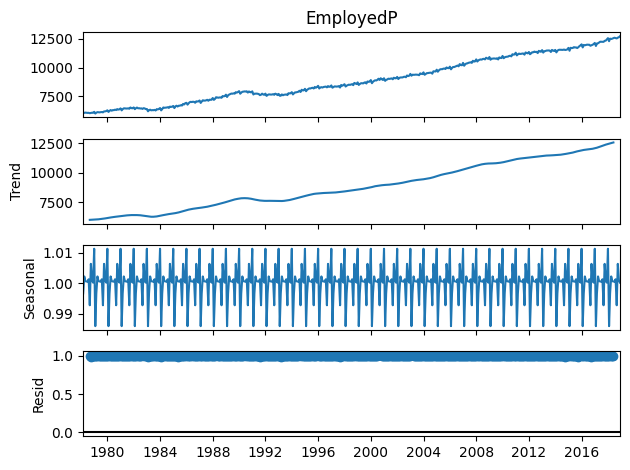

In [9]:
aultsdecm=seasonal_decompose(aults, model='multiplicative')
aultsdecm.plot()
plt.savefig("decomposition", transparent=True, dpi=600)
plt.show()

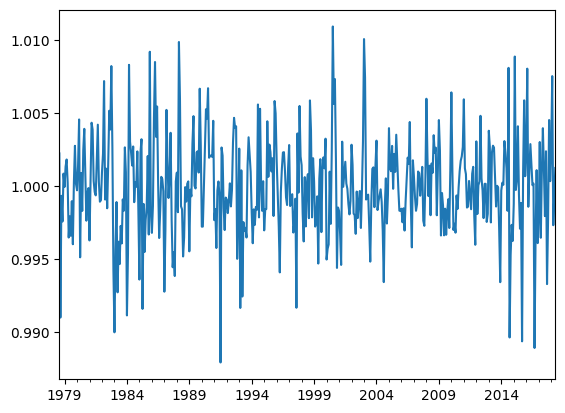

In [10]:
aultsdecmResid=aultsdecm.resid.dropna()
aultsdecmResid.plot()
plt.savefig("residuals", transparent=True, dpi=600)
plt.show()

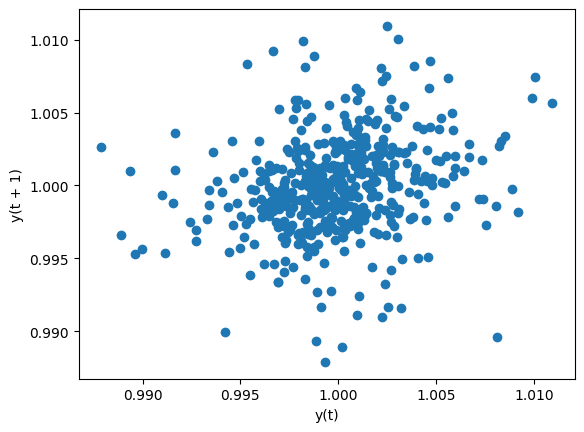

In [11]:
lag_plot(aultsdecmResid)
plt.savefig("residuals_lag", transparent=True, dpi=600)
plt.show()

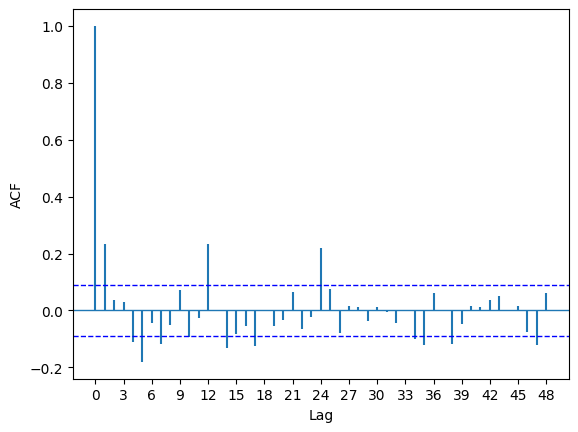

In [18]:
acf_pacf_fig(aultsdecmResid, both=False, lag=48)
plt.savefig("autocorrelation", transparent=True, dpi=600)
plt.show()